In [43]:
# Defines
#=================================================#
IS_TRAIN_NOT_TEST = True

ENV_LOCAL_MACHINE   = 1
ENV_GOOGLE_COLLABS  = 2
ENV_KAGGLE          = 3
ENVIRONMENT = ENV_LOCAL_MACHINE

#=================================================#
RANDOM_SEED = 214
OVERSAMPLING_RATIO = 0.3
UNDERSAMPLING_RATIO = 0.8
N_JOBS = -1

#=================================================#
CSV_DATASET_INPUT                   = "dataset_transformed.csv"
CSV_DATASET_INPUT_TEST              = "dataset_balanced_test.csv"
CSV_DATASET_INPUT_TRAIN             = "dataset_balanced_train.csv"
CSV_DATASET_INPUT_RUS_TRAIN         = "dataset_balanced_train_rus.csv"
CSV_DATASET_INPUT_NM_TRAIN          = "dataset_balanced_train_nm.csv"
CSV_DATASET_INPUT_SMOTE_TRAIN       = "dataset_balanced_train_smote.csv"
CSV_DATASET_INPUT_ADASYN_TRAIN      = "dataset_balanced_train_adasyn.csv"
CSV_DATASET_INPUT_TOMEK_TRAIN       = "dataset_balanced_train_tomek.csv"
CSV_DATASET_INPUT_ENN_TRAIN         = "dataset_balanced_train_enn.csv"

CSV_DATASET_INPUT_NM80_TOMEK30_TRAIN      = "dataset_balanced_train_nm80_tomek30.csv"
CSV_DATASET_INPUT_NM65_TOMEK30_TRAIN      = "dataset_balanced_train_nm65_tomek30.csv"
CSV_DATASET_INPUT_NM80_TOMEK50_TRAIN      = "dataset_balanced_train_nm80_tomek50.csv"
CSV_DATASET_INPUT_NM90_TOMEK15_TRAIN      = "dataset_balanced_train_nm90_tomek15.csv"

CSV_DATASET_OUTPUT_NM90_ENN15_TRAIN = "dataset_balanced_train_nm90_enn15.csv"
CSV_DATASET_OUTPUT_NM90_ENN30_TRAIN = "dataset_balanced_train_nm90_enn30.csv"

if ENVIRONMENT == ENV_LOCAL_MACHINE:
    PATH_DATASET_INPUT  = "./outputs/"
    PATH_DATASET_OUTPUT = "./outputs/"
if ENVIRONMENT == ENV_GOOGLE_COLLABS:
    PATH_DATASET_INPUT  = "drive/MyDrive/UTN_Finales/[F] Aprendizaje Automatico/Repositorio/outputs/"
    PATH_DATASET_OUTPUT = "drive/MyDrive/UTN_Finales/[F] Aprendizaje Automatico/Repositorio/outputs/"

FEATURE_TARGET = "is_click"

In [14]:
import pandas as pd
import numpy as np

from collections import Counter

%pip install imblearn

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, log_loss
from sklearn.utils import resample

import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Import Dataset Test CSV
dataset_test = pd.read_csv(PATH_DATASET_INPUT+CSV_DATASET_INPUT_TEST)
print(f"dataset_rows = {dataset_test.shape[0]}")

X_test = dataset_test.drop(FEATURE_TARGET, axis=1)
y_test = dataset_test[FEATURE_TARGET]

dataset_rows = 92659


dataset_rows = 261078
dataset_rows = 211406
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     86393
           1       0.09      0.02      0.03      6266

    accuracy                           0.92     92659
   macro avg       0.51      0.50      0.50     92659
weighted avg       0.88      0.92      0.90     92659

Log Loss: 0.31
AUC-ROC: 0.55


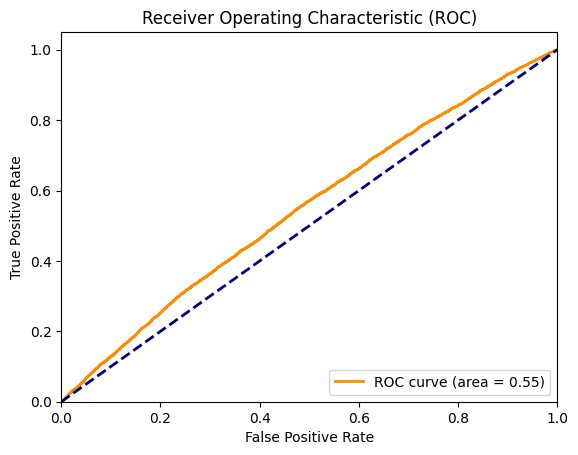

In [45]:
# Import Balanced CSV
dataset_train = pd.read_csv(PATH_DATASET_INPUT+CSV_DATASET_INPUT_ENN_TRAIN)
print(f"dataset_rows = {dataset_train.shape[0]}")

# Remove duplicate
dataset_train = dataset_train.drop_duplicates()
print(f"dataset_rows = {dataset_train.shape[0]}")

X_train = dataset_train.drop(FEATURE_TARGET, axis=1)
y_train = dataset_train[FEATURE_TARGET]





model = RandomForestClassifier(random_state=RANDOM_SEED, max_depth = None, min_samples_split = 7, min_samples_leaf = 3, bootstrap = True)
model.fit(X_train, y_train)





y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.2f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
